In [1]:
import requests
import csv
import bs4
from bs4 import BeautifulSoup

In [2]:
def grabData(pageAmount, name, fileName):
    listname = []
    listflavor = []
    listenvir = []
    listserv = []
    listcomm = []
    listpage = []
    listprice = []
    for i in range(1, pageAmount):
        url = 'https://www.dianping.com/search/keyword/7/10_%s/p%s' % (name, i)
        print(url)
        r = requests.get(url, headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 '  
                          '(KHTML, like Gecko) Chrome/45.0.2454.101 Safari/537.36'})
        r.encoding = 'utf8'
        mypage = BeautifulSoup(r.text)

        main_div = mypage.find_all('div', attrs = {'class': 'txt'})
        for main in main_div:
            tit = None
            comm = None
            tit = main.find_all('div', attrs = {'class':'tit'})
            marks = main.find_all('span', attrs = {'class':'comment-list'})
            comm = main.find_all('div', attrs = {'class':'comment'})
            pages = main.find_all('a', attrs = {'data-hippo-type':'shop'})
            myprice = main.find_all('a', attrs = {'class':'mean-price'})
            
            if not marks:
                pass
            else:
                for title in tit:
                    branch_name = title.find('h4')
                    listname.append(branch_name.text)
                for list in marks:
                    flavor = list.find('b')
                    listflavor.append(flavor.text)
                    envir = list.find_all('b')[1]
                    listenvir.append(envir.text)
                    serv = list.find_all('b')[2]
                    listserv.append(serv.text)
                for comment in comm:
                    remark = comment.find('b')
                    if remark is not None:
                        listcomm.append(remark.text)
                    else:
                        listcomm.append('0')
                for page in pages:
                    page_link = page['href']
                    listpage.append(page_link)
                    #print(page_link)
                for price in myprice:
                    cost = price.find('b')
                    if cost is not None:
                        price_str = cost.text
                        price = price_str[1:]
                        listprice.append(price)
                    else:
                        listprice.append('0')

    print('name:' + str(len(listname)) + ' flavor:' + str(len(listflavor)) + ' envir:' + str(len(listenvir)) + ' serv:' + str(len(listserv)) + ' comm:' + str(len(listcomm)) + ' links:' + str(len(listpage)) + ' price:' + str(len(listprice)))

    with open(fileName + '.csv','w') as f:
        writer = csv.writer(f)
        header = ['name','taste','environment','service','price','comment-volume','link']
        writer.writerow(header)
        writer.writerows(zip(listname,listflavor,listenvir,listserv,listprice,listcomm,listpage))

In [3]:
grabData(19,'麦当劳', 'mcdonald')
grabData(19,'肯德基','kfc')
grabData(6,'大家乐','dajiale')
grabData(11,'真功夫','zhengongfu')
grabData(15,'华莱士', 'wallace')

https://www.dianping.com/search/keyword/7/10_麦当劳/p1


/Users/jiaxi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/jiaxi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


https://www.dianping.com/search/keyword/7/10_麦当劳/p2
https://www.dianping.com/search/keyword/7/10_麦当劳/p3
https://www.dianping.com/search/keyword/7/10_麦当劳/p4
https://www.dianping.com/search/keyword/7/10_麦当劳/p5
https://www.dianping.com/search/keyword/7/10_麦当劳/p6
https://www.dianping.com/search/keyword/7/10_麦当劳/p7
https://www.dianping.com/search/keyword/7/10_麦当劳/p8
https://www.dianping.com/search/keyword/7/10_麦当劳/p9
https://www.dianping.com/search/keyword/7/10_麦当劳/p10
https://www.dianping.com/search/keyword/7/10_麦当劳/p11
https://www.dianping.com/search/keyword/7/10_麦当劳/p12
https://www.dianping.com/search/keyword/7/10_麦当劳/p13
https://www.dianping.com/search/keyword/7/10_麦当劳/p14
https://www.dianping.com/search/keyword/7/10_麦当劳/p15
https://www.dianping.com/search/keyword/7/10_麦当劳/p16
https://www.dianping.com/search/keyword/7/10_麦当劳/p17
https://www.dianping.com/search/keyword/7/10_麦当劳/p18
name:214 flavor:214 envir:214 serv:214 comm:214 links:214 price:214
https://www.dianping.com/search/keyword

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as font_manager

In [5]:
def calcMark(highVolume, volume):
    return volume/highVolume*10 

def findHighComment(columnName):
    high = 0
    df = pd.read_csv('mcdonald.csv')
    if df[columnName].mean() > high:
        high = df[columnName].mean()
    df = pd.read_csv('kfc.csv')
    if df[columnName].mean() > high:
        high = df[columnName].mean()
    df = pd.read_csv('dajiale.csv')
    if df[columnName].mean() > high:
        high = df[columnName].mean()
    df = pd.read_csv('zhengongfu.csv')
    if df[columnName].mean() > high:
        high = df[columnName].mean()
    df = pd.read_csv('wallace.csv')
    if df[columnName].mean() > high:
        high = df[columnName].mean()
    return high

def findHighVol():
    high = 0
    df = pd.read_csv('mcdonald.csv')
    if df["service"].count() > high:
        high = df["service"].count()
    df = pd.read_csv('kfc.csv')
    if df["service"].count() > high:
        high = df["service"].count()
    df = pd.read_csv('dajiale.csv')
    if df["service"].count() > high:
        high = df["service"].count()
    df = pd.read_csv('zhengongfu.csv')
    if df["service"].count() > high:
        high = df["service"].count()
    df = pd.read_csv('wallace.csv')
    if df["service"].count() > high:
        high = df["service"].count()
    return high

In [6]:
df = pd.read_csv('mcdonald.csv')
highComment = findHighComment("comment-volume")
highVolume = findHighVol()
mcdonald_marks = [df["taste"].mean(),df["environment"].mean(),df["service"].mean(),calcMark(highComment,df["comment-volume"].mean()),calcMark(highVolume,df["service"].count())]

df.describe()
#df = pd.read_csv('kfc.csv')
#kfc_marks = [df["taste"].mean(),df["environment"].mean(),df["service"].mean(),calcMark(highComment,df["comment-volume"].mean()),calcMark(highVolume,df["service"].count())]

#df = pd.read_csv('dajiale.csv')
#dajiale_marks = [df["taste"].mean(),df["environment"].mean(),df["service"].mean(),calcMark(highComment,df["comment-volume"].mean()),calcMark(highVolume,df["service"].count())]

#df = pd.read_csv('wallace.csv')
#wallace_marks = [df["taste"].mean(),df["environment"].mean(),df["service"].mean(),calcMark(highComment,df["comment-volume"].mean()),calcMark(highVolume,df["service"].count())]

#df = pd.read_csv('zhengongfu.csv')
#zhengongfu_marks = [df["taste"].mean(),df["environment"].mean(),df["service"].mean(),calcMark(highComment,df["comment-volume"].mean()),calcMark(highVolume,df["service"].count())]


,taste,environment,service,price,comment-volume
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,7.330374,7.354673,7.291589,24.172897,44.303738
std,0.238467,0.242157,0.254397,8.668816,36.561817
min,6.600000,6.700000,6.300000,0.000000,1.000000
25%,7.200000,7.200000,7.200000,22.000000,18.000000
50%,7.300000,7.400000,7.300000,26.000000,34.500000
75%,7.400000,7.500000,7.400000,28.000000,59.500000
max,8.000000,8.400000,8.100000,54.000000,213.000000


In [7]:
df = pd.read_csv('kfc.csv')
kfc_marks = [df["taste"].mean(),df["environment"].mean(),df["service"].mean(),calcMark(highComment,df["comment-volume"].mean()),calcMark(highVolume,df["service"].count())]

df.describe()

,taste,environment,service,price,comment-volume
count,206.000000,206.000000,206.000000,206.000000,206.000000
mean,7.265534,7.325243,7.248058,25.441748,70.174757
std,0.179773,0.182513,0.207825,11.948018,490.491261
min,6.400000,6.500000,6.500000,0.000000,1.000000
25%,7.200000,7.200000,7.200000,24.000000,15.250000
50%,7.300000,7.300000,7.300000,28.000000,30.000000
75%,7.400000,7.400000,7.300000,29.000000,47.750000
max,8.100000,8.200000,8.200000,78.000000,7057.000000


In [8]:
df = pd.read_csv('dajiale.csv')
dajiale_marks = [df["taste"].mean(),df["environment"].mean(),df["service"].mean(),calcMark(highComment,df["comment-volume"].mean()),calcMark(highVolume,df["service"].count())]

df.describe()

,taste,environment,service,price,comment-volume
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,7.195833,7.312500,7.250000,34.458333,410.125000
std,0.207426,0.243726,0.230312,7.581322,354.791343
min,6.800000,6.800000,6.800000,0.000000,1.000000
25%,7.075000,7.200000,7.200000,35.000000,132.500000
50%,7.200000,7.400000,7.250000,36.000000,419.500000
75%,7.325000,7.500000,7.400000,36.000000,586.250000
max,7.600000,7.700000,7.600000,41.000000,1401.000000


In [9]:
df = pd.read_csv('wallace.csv')
wallace_marks = [df["taste"].mean(),df["environment"].mean(),df["service"].mean(),calcMark(highComment,df["comment-volume"].mean()),calcMark(highVolume,df["service"].count())]
df.describe()

,taste,environment,service,price,comment-volume
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,7.165753,7.165753,7.130822,15.041096,120.253425
std,0.324715,0.310825,0.352051,8.832445,157.070018
min,6.000000,6.300000,6.000000,0.000000,0.000000
25%,7.000000,6.900000,6.900000,14.000000,3.000000
50%,7.200000,7.200000,7.200000,19.000000,33.500000
75%,7.400000,7.400000,7.400000,20.000000,218.750000
max,7.800000,7.800000,7.700000,33.000000,864.000000


In [10]:
df = pd.read_csv('zhengongfu.csv')
zhengongfu_marks = [df["taste"].mean(),df["environment"].mean(),df["service"].mean(),calcMark(highComment,df["comment-volume"].mean()),calcMark(highVolume,df["service"].count())]
df.describe()

,taste,environment,service,price,comment-volume
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,7.217355,7.329752,7.199174,22.925620,243.702479
std,0.223487,0.225701,0.250498,9.312326,208.009801
min,6.400000,6.500000,6.300000,0.000000,1.000000
25%,7.100000,7.200000,7.000000,21.000000,62.000000
50%,7.200000,7.300000,7.200000,24.000000,215.000000
75%,7.400000,7.500000,7.400000,27.000000,358.000000
max,7.600000,7.900000,7.700000,51.000000,1020.000000


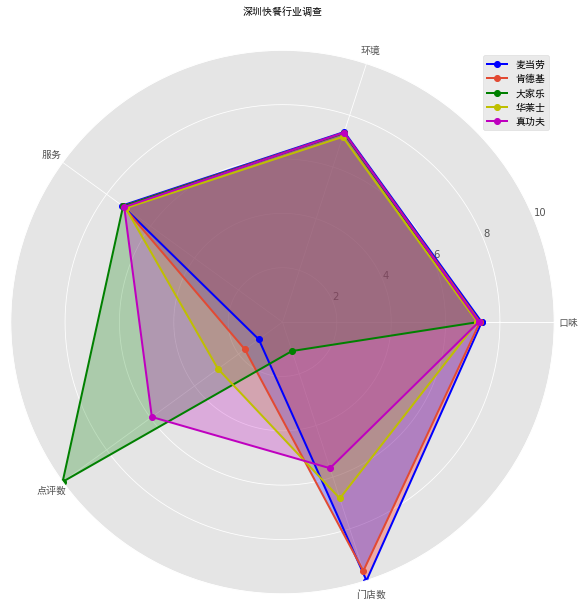

In [16]:
#标签
labels = np.array(['口味','环境','服务','点评数','门店数'])
#数据个数
dataLenth = 5
#数据

mcdonald_data = np.array(mcdonald_marks)
kfc_data = np.array(kfc_marks)
dajiale_data = np.array(dajiale_marks)
wallace_data = np.array(wallace_marks)
zhengongfu_data = np.array(zhengongfu_marks)

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
mcdonald_data = np.concatenate((mcdonald_data, [mcdonald_data[0]])) # 闭合
kfc_data = np.concatenate((kfc_data, [kfc_data[0]])) # 闭合
dajiale_data = np.concatenate((dajiale_data, [dajiale_data[0]])) # 闭合
wallace_data = np.concatenate((wallace_data, [wallace_data[0]])) # 闭合
zhengongfu_data = np.concatenate((zhengongfu_data, [zhengongfu_data[0]])) # 闭合


angles = np.concatenate((angles, [angles[0]])) # 闭合

fig = plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
ax = fig.add_subplot(111, polar=True)# polar参数！！
ax.plot(angles, mcdonald_data, 'bo-', linewidth=2, label='麦当劳')# 画线
ax.fill(angles, mcdonald_data, facecolor='r', alpha=0.25)# 填充
# 绘制第二条折线图
ax.plot(angles, kfc_data, 'o-', linewidth=2, label = '肯德基')
ax.fill(angles, kfc_data, facecolor='b', alpha=0.25)# 填充
# 绘制第三条折线图
ax.plot(angles, dajiale_data, 'go-', linewidth=2, label = '大家乐')
ax.fill(angles, dajiale_data, facecolor='g', alpha=0.25)# 填充
# 绘制第四条折线图
ax.plot(angles, wallace_data, 'yo-', linewidth=2, label = '华莱士')
ax.fill(angles, wallace_data, facecolor='y', alpha=0.25)# 填充
# 绘制第五条折线图
ax.plot(angles, zhengongfu_data, 'mo-', linewidth=2, label = '真功夫')
ax.fill(angles, zhengongfu_data, facecolor='m', alpha=0.25)# 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title("深圳快餐行业调查", va='bottom', fontproperties="SimHei")
ax.set_rlim(0,10)
ax.grid(True)
# 设置图例
font = font_manager.FontProperties(family='SimHei')
plt.legend(loc = 'best',prop=font)
plt.show()

In [36]:
rank_dic = {'urr-rank10' : 'LV1', 'urr-rank20' : 'LV2', 'urr-rank30' : 'LV3', 'urr-rank40' : 'LV4', 'urr-rank45' : 'LV5', 'urr-rank50' : 'LV6', 'urr-rank60' : 'LV7' }

In [111]:
df = pd.read_csv('dajiale.csv')
links = df["link"]
out_file = open("dajiale_comments", "w")
counter = 0

list_comm_time = []
list_comm_rank = []
list_comm_comm = []

for link in links:
    counter = counter + 1
    print('**counter:' + str(counter))
    if counter > 2:
        print('**break')
        break
    import time
    time.sleep(4)
    link = link + '/review_all'
    print(link)
    r = requests.get(link, headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36'})
    r.encoding = 'utf8'
    page = BeautifulSoup(r.text)
    print('***page\n')
    #print(page)
    main_comm_div = page.find_all('div', attrs = {'class' : 'main-review'})
              
    if len(main_comm_div) == 0:
        out_file.write(link)
        out_file.write("\n")
    
    for comm_div in main_comm_div:
        comment_div = comm_div.find('div', attrs = {'class': 'review-words Hide'})
        print("comment:") 
        print(comment_div)
        print("comment starts")
        if not comment_div:
            continue
        comment_str = comment_div.text
        comment_str = comment_str.replace(" ", "").replace("\n","").replace("收起评论","")
        comment_str = comment_str + "\n"
        #print(comment_str)
        list_comm_comm.append(comment_str)
        out_file.write(comment_str)
        print("comments ends")
        
        user_div = comm_div.find('div', attrs = {'class' : 'dper-info'})
        rank = user_div.find('span')['class']
        rank_data = rank_dic[rank[1]]
        print(rank_data)
        list_comm_rank.append(rank_data)
        time = comm_div.find('span', attrs = {'class' : 'time'})
        time_str = time.text
        print("time:")
        if "更新于" not in time_str: 
            time_data = time_str.strip()
        else:
            time_data = time_str.split('更新于')[1].strip();
        time_data = time_data.split(' ')[0]
        time_data_list = time_data.split('-')
        time_data = time_data_list[0] + '-' + time_data_list[1]
        list_comm_time.append(time_data)
        print(time_data)
        
with open('comments.csv','w') as f:
        writer = csv.writer(f)
        header = ['time','rank','comment']
        writer.writerow(header)
        writer.writerows(zip(list_comm_time,list_comm_rank,list_comm_comm))

out_file.close()

**counter:1
http://www.dianping.com/shop/32529713/review_all
***page

**counter:2


/Users/jiaxi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/jiaxi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


http://www.dianping.com/shop/32529708/review_all
***page

**counter:3
**break


In [534]:
from os import path
import jieba
import sys

stopwords_path = 'stop_words' # 停用词词表
text_path = 'dajiale_comments_test' #设置要分析的文本路径
text = open(text_path).read()


def jiebaclearText(text):
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr="/ ".join(seg_list)
    f_stop = open(stopwords_path)
    try:
        f_stop_text = f_stop.read( )
    finally:
        f_stop.close( )
    f_stop_seg_list=f_stop_text.split('\n')
    for myword in liststr.split('/'):
        if not(myword.strip() in f_stop_seg_list) and len(myword.strip())>1:
            mywordlist.append(myword)
    return ''.join(mywordlist)

text1 = jiebaclearText(text)
print(text1)

 催哥 粉丝汤 难吃 份量 所以 对面 吃个 大家乐 快餐 以前 他家 快餐 烧腊 不错 万象 后面 几家 烧腊 感觉 这个 真是 不能 环境卫生 皮沙发 坐烂 皮沙发 看着 比较 倒味口 挨着 最后 一个 位置 知道 那里 冒出来 类似 牙齿 那种 臭味 点单 服务员 知道 为啥 高兴 太久 十几个 小时 飞行 之后 第一个 直奔 餐厅 哪里 十天 欧洲 沙拉 欧式 面包 法餐 船上 新式 中餐 不能 习惯 部分 出品 更是 惊艳 然而 大脑 忍不住 怀念 熟悉 味道 作为 连锁 餐厅 大家乐 不能 称得上 好吃 部分 出品 更是 有些 雷区 可是 陪伴 长大 地方 十多年 南山 好像 一直 那里 店里 装修 历经 翻新 一杯 奶茶 浸透 岁月 怀旧 气息 一哥 猪扒 年少时 各式 烧腊 稳定 出品 猪扒 蜜糖 鸡翼 惊艳 至于 早餐 一份 丰盛 热腾腾 港式 早餐 总是 喜人 就让 我们 短暂 忘记 里面 隐藏 卡路里 这个 世界 多少 东西 十年 大家乐 旁边 吉之岛 搬离 之际 大家乐 一家 知名 连锁 快餐店 点单 品种 简单 好去处 每次 大家乐 总是 忍不住 一份 一哥 猪扒 带骨 猪扒 浓郁 酱汁 味道 不错 里面 还有 青豆 番茄 软软 好吃 底下 炒饭 个人 觉得 麻麻 有点 偏干身 如果 湿软 一点 更好 某人 一哥 猪排 有着 某种程度 执念 所以 愉快 过来 猪扒 腌渍 过有 味道 单吃 不错 另外 菠萝 梅子 京都 牛肉 酸甜 开胃 适合 食欲 不好 某人 光吃 猪扒 炒饭 饱饱 我俩 剩下 一半 这里 分量 相当 大家乐 海岸 城店 地址 海岸 购物中心 一楼 ZARA 每次 知道 什么 时候 大家乐 一定 不会错 因为 太爱 它家 叉烧 油鸡 几乎 每次 必点 夏天 餐配 包茶 已经 适合 夏天 炎热 天气 希望 出来 哪怕 白开水 可以 海岸 城店 这是 一家 无数次 可以 银联 钱包 买单 优惠 10 10 可以 划算 所以 爸妈 经常 这家 早餐 哈哈 知道 优惠 什么 时候 截止 所以 羊毛 宝宝 赶快 环境 位置 很多 桌椅 很多 所以 略显 拥挤 反正 不是 舒服 不过 大家乐 属于 快餐 要求 这么 匆匆 匆匆 服务 服务 OK 点餐 服务员 指引 菜品 算是 比较 热情 普通 服务员 忙碌 所以 没什么 空理 哈哈哈哈

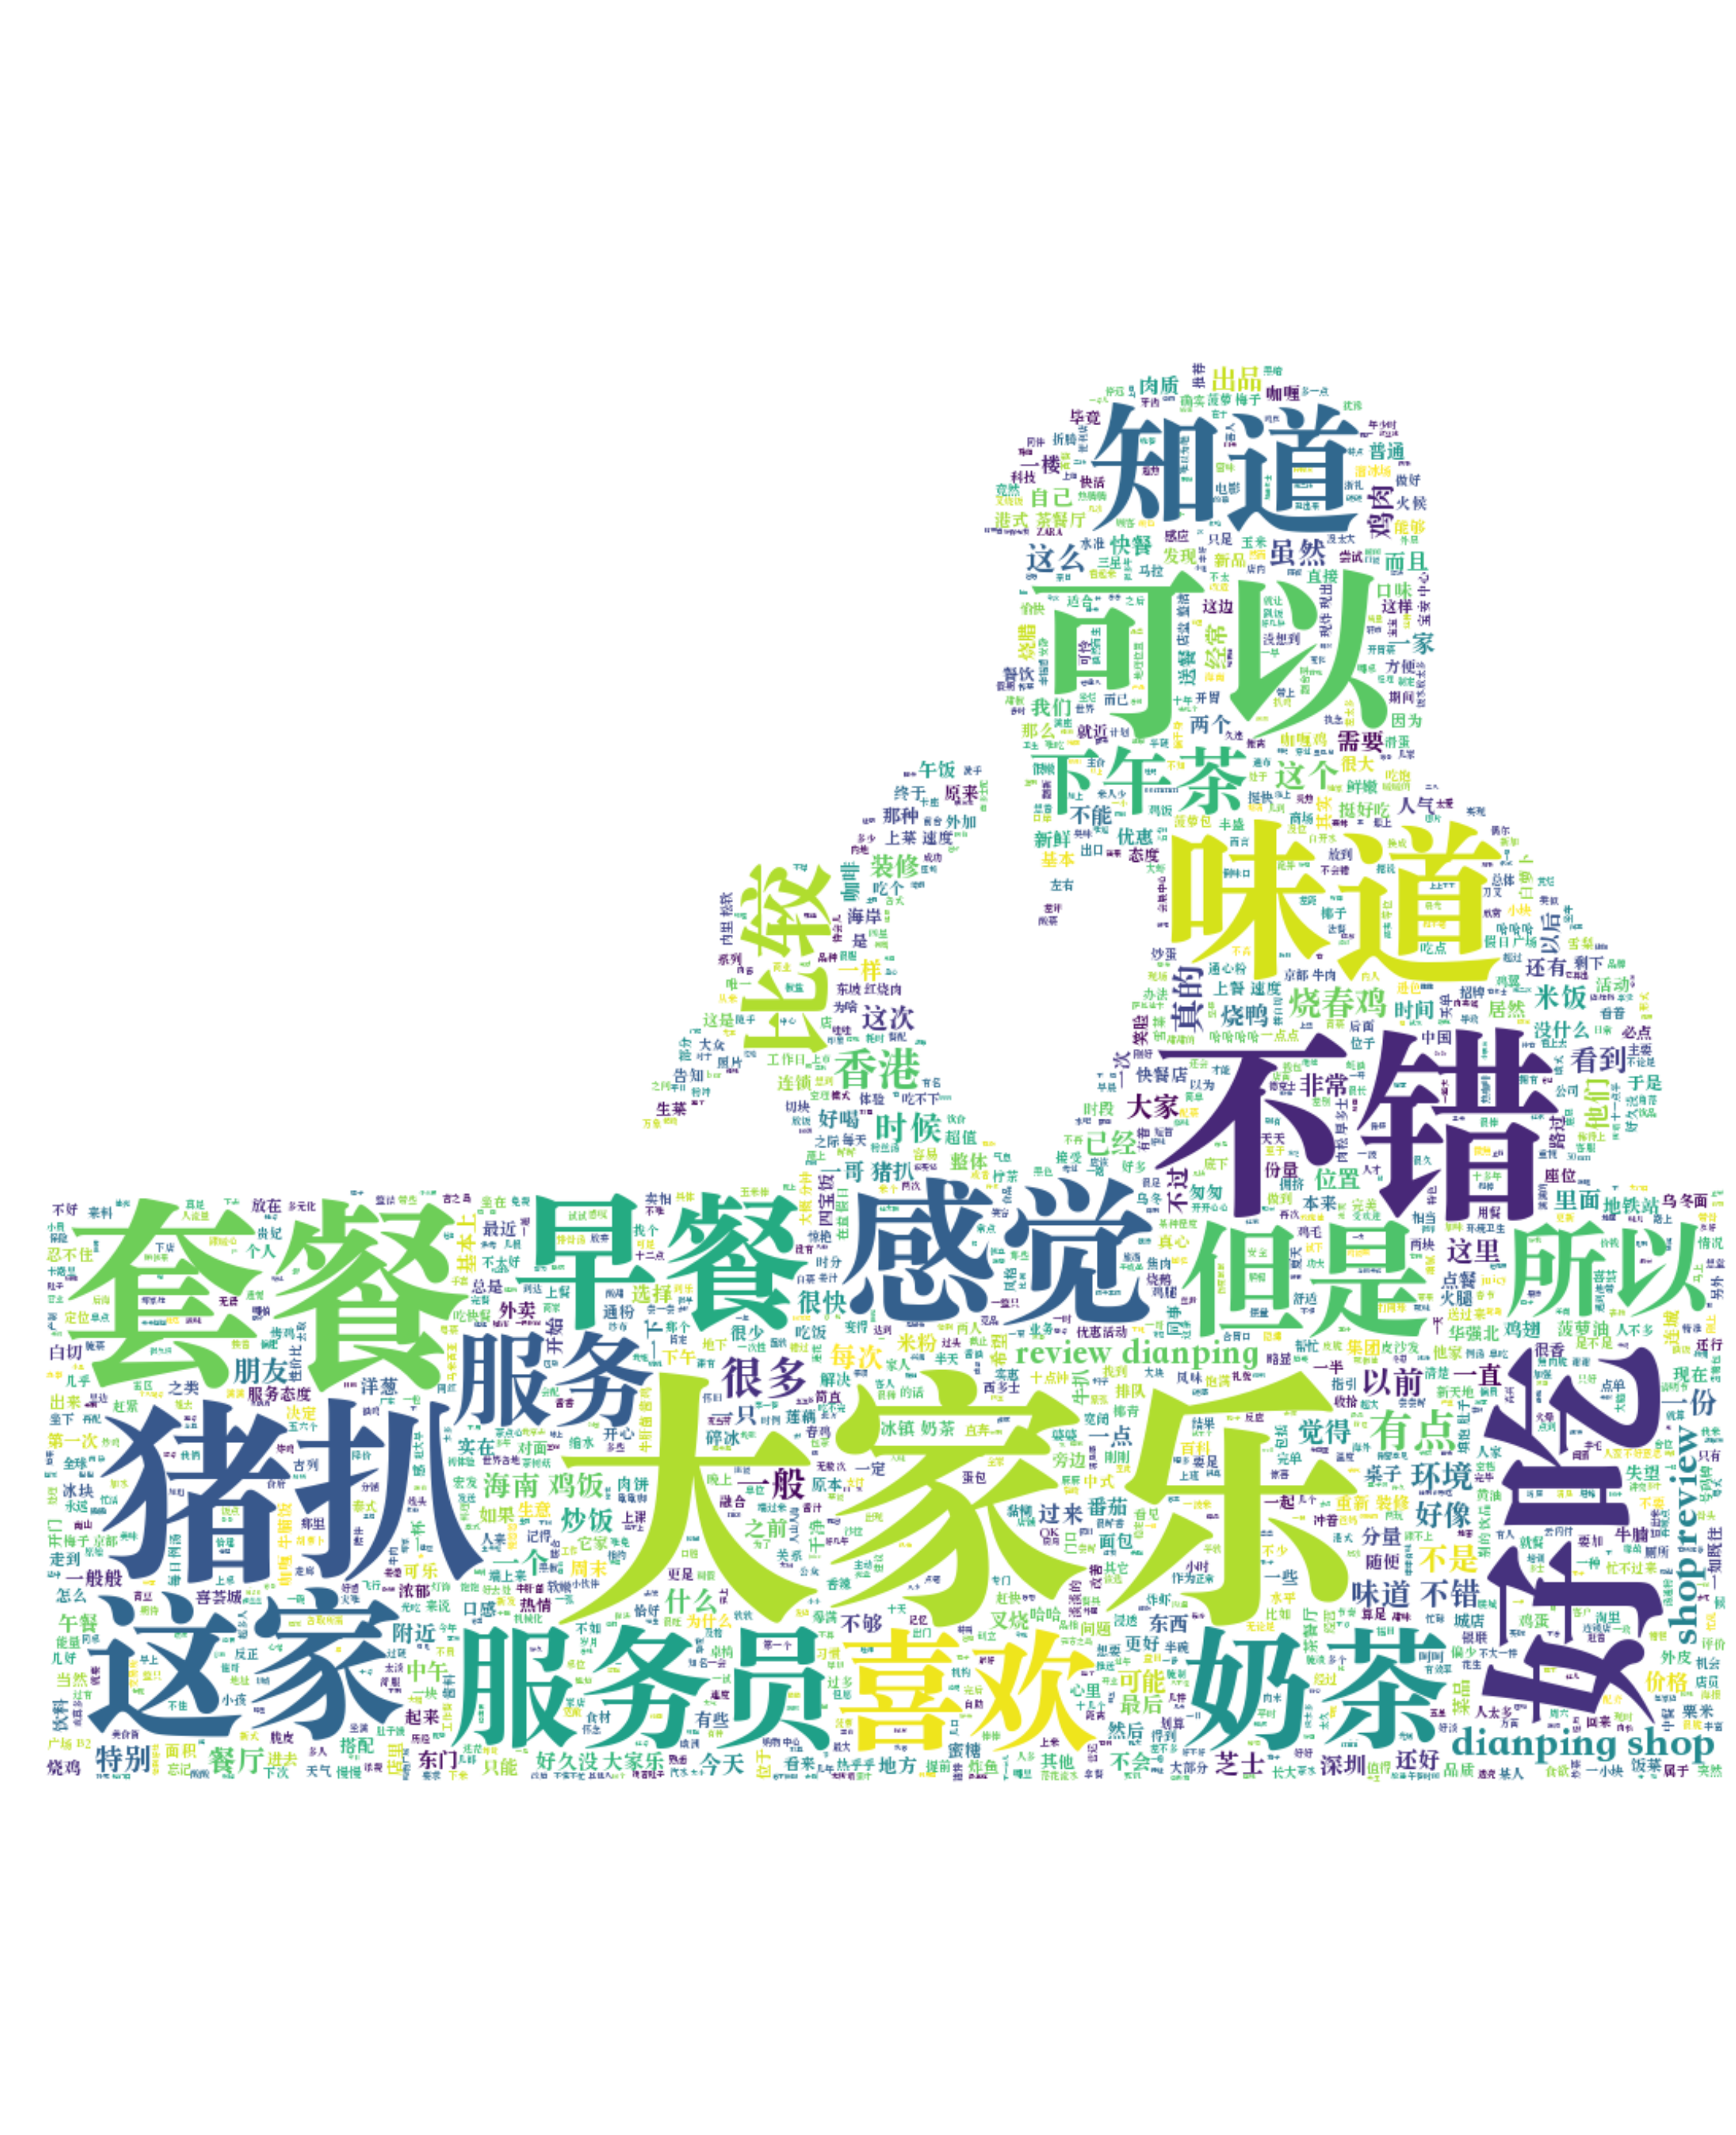

In [535]:
import wordcloud
from PIL import Image
import numpy as np

mask = np.array(Image.open('pili.jpeg'))

wc = wordcloud.WordCloud(background_color="white", max_words=2000, font_path='/Library/Fonts/Songti.ttc', mask=mask)
wc.generate(text1) 
plt.figure(figsize=(50, 50))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

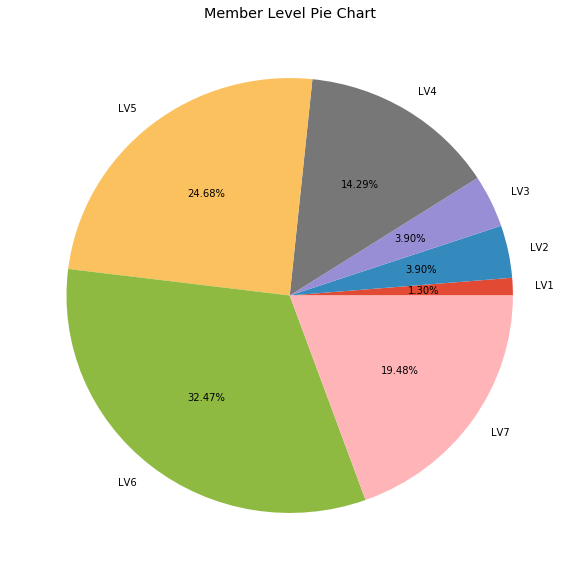

In [112]:
from collections import Counter
c = Counter()

df = pd.read_csv('comments.csv')
labels=['LV1','LV2','LV3','LV4','LV5','LV6','LV7']  

lvl_counter = Counter()
df['rank'].apply(lambda t: lvl_counter.update(t.split()))
lvl_counter = sorted(lvl_counter.items())

                     
fig = plt.figure(figsize=(10, 10)) 
plt.pie([float(v[1]) for v in lvl_counter], labels=[k[0] for k in lvl_counter],autopct='%1.2f%%')
plt.title("Member Level Pie Chart")   
plt.show()


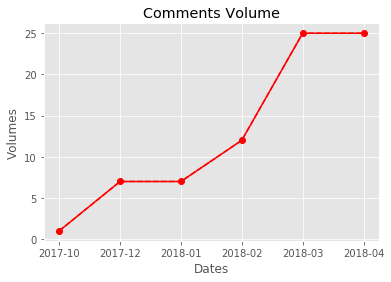

In [119]:
import matplotlib.pyplot as plt2
df = pd.read_csv('comments.csv')
time_counter = Counter()
df['time'].apply(lambda t: time_counter.update(t.split()))
time_counter = sorted(time_counter.items())
time_counter

x = [k[0] for k in time_counter]
y = [float(v[1]) for v in time_counter]

#x=np.arange(20,350)  
#l1=plt.plot(x,y,'r--',label='type1')
l1=plt2.plot(x,y,'r--') 
plt2.plot(x,y,'ro-')  
plt2.title('Comments Volume')  
plt2.xlabel('Dates')  
plt2.ylabel('Volumes')  
plt2.figure(figsize=(50, 50)) 
#plt.legend()  
plt2.show()  

In [114]:
df.describe

<bound method NDFrame.describe of        time rank                                            comment
0   2018-03  LV6  \t\t催哥鸭血粉丝汤太难吃，份量少，所以在到对面吃个大家乐快餐，以前吃他家快餐的烧腊还不错...
1   2018-03  LV5  \t\t在十几个小时的飞行时之后 你猜我第一个直奔的餐厅会是哪里？十天的欧洲行 沙拉 欧式面...
2   2018-04  LV5  \t\t大家乐，一家知名的连锁快餐店，点单品种蛮多的，是简单吃一吃的好去处…每次来大家乐，总...
3   2018-04  LV7  \t\t某人对一哥焗猪排饭有着某种程度的执念，所以又愉快地过来吃了。猪扒是腌渍过有味道的，单...
4   2018-03  LV4  \t\t［大家乐海岸城店］地址：海岸城购物中心一楼ZARA旁每次不知道吃什么的时候选大家乐一...
5   2018-01  LV7  \t\t🍳大 家 乐 餐 厅 （海岸城店）🍳这是一家来了无数次的店      ⚠️可以用银联...
6   2018-03  LV6  \t\t这家大家乐装修风格跟其他家不大一样这家透亮一点 不是黑色调最喜欢他家的招牌“芝士焗猪...
7   2018-04  LV5  \t\t后海地铁站.海岸城.12:00开始就一直很多人.吃完一波来一波.确实大家乐的味道还是...
8   2018-03  LV6  \t\t各方面都还不错的香港连锁快餐店，以前偶尔来，但现在距离上一次已经很久了，再次吃居然没...
9   2018-04  LV5  \t\t【深圳旅游】😍😍😍【下午茶系列】闺蜜说是香港的连锁店，特地带我来试下，我们两玩的没吃...
10  2018-04  LV7  \t\t四星推荐。看完电影，几个小伙伴，要赶着去打网球，大家肯定随便吃吃，一致选择（大家乐）...
11  2018-04  LV6  \t\t周末在附近上课中午找吃的看到大家乐就进去了人还挺多的点了个四宝饭前台服务员没有跟我解...
12  2018-04  LV5  \t\t肚子饿了溜达到大家乐门口，之前听同事说这家餐厅生意在这条街里面算很好的。进去看了一下...
13  2018-04  L